Digits Classification
=================

Each record consists in an 8x8 grayscale bitmap of a digit.

For more info see [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from pyautospec import DatasetMps

In [2]:
digits = load_digits()

<IPython.core.display.Javascript object>


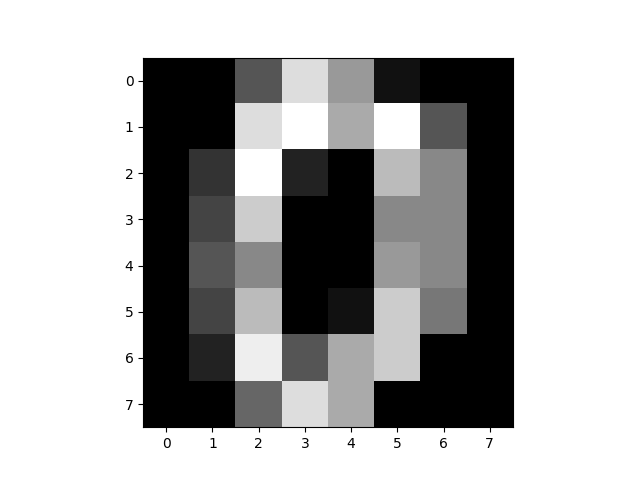

In [3]:
plt.figure()
plt.imshow(digits.images[0], cmap='gray');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)

In [5]:
digits_mps = DatasetMps(64, x0=np.zeros((64,)), x1=16*np.ones((64,)), max_bond_d=50, class_n=10)

digits_mps

  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 64│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:  10
      bond dim:   2 (max: 50)
          type: classification
        

lot of patience needed here .....

In [6]:
digits_mps.fit(X_train, y_train, learn_rate=0.8, batch_size=400, epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch    1: 0.42
epoch    2: 0.34
epoch    3: 0.29
epoch    4: 0.27
epoch    5: 0.25


  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 64│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:  10
      bond dim:  50 (max: 50)
          type: classification
        

In [7]:
print("accuracy (train): {:.1f}%".format(100 * digits_mps.score(X_train, y_train)))
print("accuracy (test):  {:.1f}%".format(100 * digits_mps.score(X_test, y_test)))

accuracy (train): 96.0%
accuracy (test):  94.8%


MIsclassified digits
---------------------------

<IPython.core.display.Javascript object>


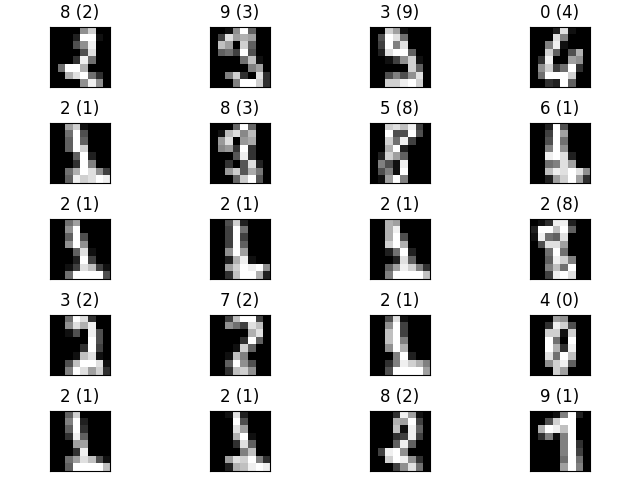

28 misclassified


In [8]:
y_pred = digits_mps.predict(X_test)

mis_pred = np.where((y_pred - y_test) != 0)[0]

fig, axis = plt.subplots(5, 4, constrained_layout = True)

print("{} misclassified".format(len(mis_pred)))

for k in range(20):
    x = k // 4
    y = k - x*4 - 1
    i = mis_pred[k]
    axis[x, y].set_title("{} ({})".format(y_pred[i], y_test[i]))
    axis[x, y].xaxis.set_visible(False)
    axis[x, y].yaxis.set_visible(False)
    axis[x, y].imshow(X_test[i,:].reshape((8,8)), cmap='gray')